# Cyclistic共享单车数据分析项目

- 项目负责：田浩
- 开始时间: 2025.06.21

## 背景
- 芝加哥一家共享单车公司 Cyclistic 营销总监认为，公司未来的成功取决于年度会员数量的最大化.希望了解临时会员和年度会员使用 Cyclistic自行车的不同方式。根据这些洞察，营销团队将设计一种新的营销策略，将临时会员转化为年度会员。
- 这些洞察需要数据以及可视化的支持，因此由我作为数据分析师展开此项目


## 利益人
- 营销总监兼经理
- 执行团队：以注重细节著称的执行团队将决定是否批准建议的营销计划。

| #  | 列名                   | 类型 (Dtype)     | 说明                                       |
| -- | ---------------------- | ---------------- | ------------------------------------------ |
| 0  | ride_id                | object           | 骑行 ID，通常是字符串                      |
| 1  | rideable_type          | object           | 车辆类型，例如 "electric_bike"、"classic_bike" |
| 2  | started_at             | datetime64[ns]   | 骑行开始时间                               |
| 3  | ended_at               | datetime64[ns]   | 骑行结束时间                               |
| 4  | start_station_name     | object           | 起始站点名称                               |
| 5  | start_station_id       | object           | 起始站点 ID（可能是字符串）                |
| 6  | end_station_name       | object           | 终点站名称                                 |
| 7  | end_station_id         | object           | 终点站 ID                                  |
| 8  | start_lat              | float64          | 起点纬度                                   |
| 9  | start_lng              | float64          | 起点经度                                   |
| 10 | end_lat                | float64          | 终点纬度                                   |
| 11 | end_lng                | float64          | 终点经度                                   |
| 12 | member_casual          | object           | 用户类型（会员或非会员）                   |
|    | **↓ 以下为分析用新增字段 ↓** |                  |                                            |
| 13 | raid_duration_min      | float64          | 骑行总时长（分钟）                         |
| 14 | start_hour             | int64            | 骑行开始时间的小时（0–23）                 |
| 15 | start_month            | int64            | 骑行开始的月份（1–12）                     |
| 16 | start_date             | object           | 骑行开始的日期（年-月-日）                 |
| 17 | start_day_of_week      | int64            | 骑行开始是星期几（0=周一，6=周日）         |
| 18 | is_weekend             | bool             | 是否为周末（周六/周日）                    |
| 19 | start_station_misson   | bool             | 起始站点是否为 UNKNOW_STAR（布尔值）       |
| 20 | end_station_misson     | bool             | 终点站点是否为 UNKNOW_END（布尔值）        |


### 分析目标：理解会员用户与临时会员的使用行为差异

In [1]:
# 导入Python库
import pandas as pd
import numpy as np

# ♻ 数据评估与清洗

使用数据集为 2024年12个月的数据

In [2]:
df = pd.read_csv('C:/Users/vast/Desktop/Cycle项目数据源/2024年12月合并数据.csv')
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member


### 初步数据探索

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5860568 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 581.3+ MB



- started_at ， ended_at 应修改为时间格式

### 关键字段分析

In [4]:
df['member_casual'].value_counts()

member_casual
member    3708910
casual    2151658
Name: count, dtype: int64

In [5]:
# 用户类型分布: 计算关键字段百分比
df['member_casual'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'

member_casual
member    63.3%
casual    36.7%
Name: proportion, dtype: object

会员用户占比63.3%  非会员36.7%

### 数据质量检查

- started_at ， ended_at 应修改为时间格式

In [6]:
# started_at 修改为时间格式
df['started_at'] = pd.to_datetime(df['started_at'],format='mixed')
df['started_at']

0         2024-01-12 15:30:27.000
1         2024-01-08 15:45:46.000
2         2024-01-27 12:27:19.000
3         2024-01-29 16:26:17.000
4         2024-01-31 05:43:23.000
                    ...          
5860563   2024-12-11 08:23:46.564
5860564   2024-12-09 12:26:15.677
5860565   2024-12-31 17:10:03.113
5860566   2024-12-01 14:39:47.216
5860567   2024-12-17 06:38:32.320
Name: started_at, Length: 5860568, dtype: datetime64[ns]

In [7]:
# ended_at 修改为时间格式
df['ended_at'] = pd.to_datetime(df['ended_at'],format='mixed')
df['ended_at']

0         2024-01-12 15:37:59.000
1         2024-01-08 15:52:59.000
2         2024-01-27 12:35:19.000
3         2024-01-29 16:56:06.000
4         2024-01-31 06:09:35.000
                    ...          
5860563   2024-12-11 08:37:34.532
5860564   2024-12-09 12:37:32.712
5860565   2024-12-31 17:17:21.838
5860566   2024-12-01 14:45:21.268
5860567   2024-12-17 06:46:27.167
Name: ended_at, Length: 5860568, dtype: datetime64[ns]

In [8]:
# 判断是否存在缺失值
df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name    1073951
start_station_id      1073951
end_station_name      1104653
end_station_id        1104653
start_lat                   0
start_lng                   0
end_lat                  7232
end_lng                  7232
member_casual               0
dtype: int64

In [9]:
# 首先，让我们更详细地分析缺失值的分布情况

null_summary = df.isnull().sum()
null_percentage = (df.isnull().sum() / len(df)) * 100
print(f'\n\t\t=== 缺失值详细分布 ===')
print('字段名称\t\t缺失数量\t缺失百分比')
for column in df.columns:
    if null_summary[column] > 0:
        print(f"{column:<20}\t{null_summary[column]:>8}\t{null_percentage[column]:>8.2f}%")
        


		=== 缺失值详细分布 ===
字段名称		缺失数量	缺失百分比
start_station_name  	 1073951	   18.33%
start_station_id    	 1073951	   18.33%
end_station_name    	 1104653	   18.85%
end_station_id      	 1104653	   18.85%
end_lat             	    7232	    0.12%
end_lng             	    7232	    0.12%


| 部分代码                               | 说明                                             |
| ---------------------------------- | ---------------------------------------------- |
| `f"..."`                           | Python 的格式化字符串（f-string），允许在字符串中嵌入变量。          |
| `{column:<20}`                     | 将变量 `column` 左对齐，占 20 个字符的宽度。用于打印字段名，统一列宽以便对齐。 |
| `\t`                               | 制表符，控制输出时横向对齐，相当于“横向的空格”。                      |
| `{null_summary[column]:>8}`        | 缺失值总数，右对齐，占 8 个字符宽度。数字对齐更美观。                   |
| `{null_percentage[column]:>8.2f}%` | 缺失值比例，右对齐，保留两位小数。后面加上 `%` 表示百分比。               |


- start_station_name  end_station_name  丢失的情况可能是没有在指定地点停车的情况，或者测试数据
- end_lat end_lng  可能是GPS设备出错，或者测试数据

In [10]:
print(f'\n\t===缺失值模式分析===')

print(f"仅起始站点缺失的记录数:{df[df['start_station_name'].isnull() & df['end_station_name'].notnull()].shape[0]:>14}")
print(f"仅终点站点缺失的记录数:{df[df['start_station_name'].notnull() & df['end_station_name'].isnull()].shape[0]:>14}")
print(f"起始，终点站均缺失的记录数:{df[df['start_station_name'].isnull() & df['end_station_name'].isnull()].shape[0]:>8}")


	===缺失值模式分析===
仅起始站点缺失的记录数:        547606
仅终点站点缺失的记录数:        578308
起始，终点站均缺失的记录数:  526345


In [11]:
# 检查GPS坐标缺失与站点信息的关系
print(f"丢失终点坐标，存在终点站信息的记录数:{df[df['end_station_name'].notnull() & df['end_lat'].isnull()].shape[0]}")

丢失终点坐标，存在终点站信息的记录数:0


In [12]:
# 按用户类型分析缺失值分布
print(f"\n=== 按用户类型分析缺失值 ===")
station_missing_by_user = df[df['start_station_name'].isnull()]['member_casual'].value_counts()
station_missing_by_user
print("起始站信息缺失的用户类型分布:")
for user_type, count in station_missing_by_user.items():
    percentage = (count / df[df['start_station_name'].isnull()].shape[0]) * 100
    print(f"{user_type} : {count} 条记录 ({percentage:.1f}%)")


=== 按用户类型分析缺失值 ===
起始站信息缺失的用户类型分布:
member : 662813 条记录 (61.7%)
casual : 411138 条记录 (38.3%)


### 处理缺失值

缺失值详细分布
| 字段名称           | 缺失数量 | 缺失百分比 |
|--------------------|----------|------------|
| start_station_name | 1,073,951 | 18.33%     |
| start_station_id   | 1,073,951 | 18.33%     |
| end_station_name   | 1,104,653 | 18.85%     |
| end_station_id     | 1,104,653 | 18.85%     |

In [13]:
print('原始数据量', len(df))

原始数据量 5860568


In [14]:
# 创建备份进行清洗，确保备份数据源
df_clean = df.copy()

In [15]:
# 策略1：删除GPS坐标完全缺失的记录 （都是无法用以分析的记录，且记录量极小）
df_clean = df_clean.dropna(subset=['end_lng','end_lat'])
print(f'删除GPS坐标后的数据量:{len(df_clean)} (删除了{len(df) - len(df_clean)}条数据)')

删除GPS坐标后的数据量:5853336 (删除了7232条数据)


In [16]:
# 为缺失站点信息填充标识符
df_clean['start_station_name'] = df_clean['start_station_name'].fillna('UNKNOWN_START')
df_clean['start_station_id'] = df_clean['start_station_id'].fillna('UNKNOWN_START_ID')
df_clean['end_station_name'] = df_clean['end_station_name'].fillna('UNKNOWN_END')
df_clean['end_station_id'] = df_clean['end_station_id'].fillna('UNKNOWN_END_ID')

In [17]:
print(f"最终清洗后剩余数据量: {len(df_clean)}")
print(f"数据保留率: {(len(df_clean) / len(df)) * 100:.2f}% ")

最终清洗后剩余数据量: 5853336
数据保留率: 99.88% 


In [18]:
print(f'清洗结果验证\n')
print(f"字段名称\tNull值和")
print(df_clean.isnull().sum())

清洗结果验证

字段名称	Null值和
ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64


## 评估数据

### 评估数据整齐度

In [19]:
df_clean.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4052930,8C1F923E85668F87,electric_bike,2024-09-30 14:13:56.188,2024-09-30 14:55:56.199,Wells St & Concord Ln,TA1308000050,UNKNOWN_END,UNKNOWN_END_ID,41.912133,-87.634656,41.930000,-87.630000,casual
2597518,8B45AB0AFE9C8157,electric_bike,2024-07-29 22:50:26.933,2024-07-29 22:55:31.506,Clark St & Newport St,632,Clark St & Wrightwood Ave,TA1305000014,41.944540,-87.654678,41.929546,-87.643118,casual
5699712,481B401F84FAA246,classic_bike,2024-12-11 07:55:12.440,2024-12-11 07:59:00.238,Damen Ave & Sunnyside Ave,TA1309000012,Ravenswood Ave & Lawrence Ave,TA1309000066,41.963250,-87.679258,41.968445,-87.674226,member
4134103,72AA76EDBB8454E3,classic_bike,2024-09-09 16:27:07.365,2024-09-09 16:57:23.357,Wentworth Ave & 24th St,TA1308000026,Indiana Ave & 31st St,TA1308000036,41.850084,-87.632141,41.838842,-87.621857,member
458081,9A6F215619E953BC,electric_bike,2024-03-25 10:05:32.000,2024-03-25 10:20:43.000,Wabash Ave & 9th St,TA1309000010,Clark St & Schiller St,TA1309000024,41.870671,-87.625731,41.907993,-87.631501,member
457462,7BD07EDBBEA20569,electric_bike,2024-03-30 14:15:20.000,2024-03-30 14:28:21.000,Paulina Ave & North Ave,TA1305000037,Clinton St & Lake St,13021,41.910366,-87.670048,41.885637,-87.641823,member
1640838,2C82E6995DBDBFCB,electric_bike,2024-05-10 19:24:18.000,2024-05-10 19:30:43.000,UNKNOWN_START,UNKNOWN_START_ID,Green St & Washington Blvd,13053,41.890000,-87.640000,41.883181,-87.648725,casual
5392587,239FE48CEC289D2C,classic_bike,2024-11-15 11:48:25.061,2024-11-15 11:58:01.352,Wabash Ave & Grand Ave,TA1307000117,Mies van der Rohe Way & Chestnut St,15529,41.891466,-87.626761,41.898587,-87.621915,casual
680822,EE2BFC88CE7C478A,classic_bike,2024-04-22 09:52:38.000,2024-04-22 10:19:58.000,Clark St & Bryn Mawr Ave,KA1504000151,Manor Ave & Leland Ave,KA1504000127,41.983593,-87.669154,41.965875,-87.700825,casual
5161040,4DD8CDE9D98E8C2C,classic_bike,2024-10-11 07:03:57.722,2024-10-11 07:12:17.145,Artesian Ave & Hubbard St,15664,Ashland Ave & Grand Ave,13434,41.889500,-87.688257,41.891072,-87.666611,member


根据随机抽取的10行数据中
- 每列一个变量
- 每行一个观察值
- 每个单元格一个值
- 每行都是一位骑行者用户的骑行记录
    - 无结构问题

### 评估数据干净度

In [20]:
df_clean.info()
df_clean.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 5853336 entries, 0 to 5860567
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 625.2+ MB


ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

无NULL值，数据类型符合逻辑

In [21]:
df_clean.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
4116657,8BF8289100222603,electric_scooter,2024-09-06 10:38:05.775,2024-09-06 10:47:22.685,Wells St & Concord Ln,TA1308000050,Broadway & Barry Ave,13137,41.912133,-87.634656,41.937582,-87.644098,member
3223311,C031C184F7479861,classic_bike,2024-08-27 06:48:16.451,2024-08-27 06:55:38.105,Ashland Ave & Wrightwood Ave,13296,Sheffield Ave & Fullerton Ave,TA1306000016,41.928830,-87.668507,41.925602,-87.653708,casual
4961957,218D4439C47A8544,classic_bike,2024-10-26 16:14:34.430,2024-10-26 17:01:32.320,Leavitt St & Armitage Ave,TA1309000029,Milwaukee Ave & Wabansia Ave,13243,41.917805,-87.682437,41.912616,-87.681391,member
5254025,D093E0AE6EB09A97,electric_bike,2024-10-07 23:39:22.314,2024-10-07 23:59:13.359,Broadway & Barry Ave,13137,UNKNOWN_END,UNKNOWN_END_ID,41.937582,-87.644098,41.990000,-87.660000,member
2809327,0DD0E0D71FB83FAD,classic_bike,2024-07-19 10:41:59.834,2024-07-19 12:01:45.733,Fairbanks Ct & Grand Ave,TA1305000003,DuSable Lake Shore Dr & Wellington Ave,TA1307000041,41.891847,-87.620580,41.936688,-87.636829,casual
3716681,648D69BF7099C843,electric_bike,2024-08-29 12:45:37.367,2024-08-29 12:53:24.830,Clark St & Elm St,TA1307000039,Mies van der Rohe Way & Chicago Ave,13338,41.901976,-87.631209,41.896945,-87.621758,member
2943199,673BB7CC1A155D08,classic_bike,2024-07-18 18:21:23.816,2024-07-18 18:26:33.535,Michigan Ave & 18th St,13150,Clinton St & 18th St,TA1307000044,41.857926,-87.624336,41.857950,-87.640826,member
1965105,D652F0B99EE82EA2,electric_bike,2024-06-03 21:30:41.928,2024-06-03 21:36:46.363,Dearborn Pkwy & Delaware Pl,TA1307000128,Kingsbury St & Erie St,13265,41.898987,-87.629907,41.893808,-87.641697,member
1436018,292478C0A4B87379,electric_bike,2024-05-31 11:47:02.000,2024-05-31 11:57:25.000,Canal St & Monroe St,13056,Michigan Ave & Lake St,TA1305000011,41.881785,-87.639639,41.886022,-87.624398,member
5119244,3443C5D1B66947D4,classic_bike,2024-10-24 23:12:04.329,2024-10-24 23:18:03.370,Ashland Ave & Wellington Ave,13269,Sheffield Ave & Wrightwood Ave,TA1309000023,41.936083,-87.669807,41.928712,-87.653833,member


In [22]:
# 观察属性 rideable_type 所有值
df_clean['rideable_type'].value_counts()

rideable_type
electric_bike       2980595
classic_bike        2728404
electric_scooter     144337
Name: count, dtype: int64

In [23]:
# 观察属性 start_station_name
df_clean['start_station_name'].value_counts()

start_station_name
UNKNOWN_START                                 1073951
Streeter Dr & Grand Ave                         65871
DuSable Lake Shore Dr & Monroe St               43824
Kingsbury St & Kinzie St                        39637
DuSable Lake Shore Dr & North Blvd              39558
                                               ...   
Public Rack - Kostner & 83rd                        1
Public Rack - Lowe Ave & 119th St                   1
Public Rack - Park Manor Elementary School          1
Parnell Ave & 127th St                              1
Laflin St & 115th St                                1
Name: count, Length: 1809, dtype: int64

In [24]:
# 观察属性 start_station_id
df_clean['start_station_id'].value_counts()

start_station_id
UNKNOWN_START_ID    1073951
13022                 65871
13300                 43824
KA1503000043          39637
LF-005                39558
                     ...   
BIKE FLEET                1
895                       1
926                       1
24467                     1
24431                     1
Name: count, Length: 1764, dtype: int64

In [25]:
# 观察属性 end_station_name
df_clean['end_station_name'].value_counts()

end_station_name
UNKNOWN_END                                        1097421
Streeter Dr & Grand Ave                              67216
DuSable Lake Shore Dr & North Blvd                   43084
DuSable Lake Shore Dr & Monroe St                    42780
Michigan Ave & Oak St                                39566
                                                    ...   
Public Rack - Peoria St & 60th St                        1
Public Rack - Damen Ave & 80th St                        1
Public Rack - Loomis Blvd & 83rd St                      1
Public Rack - Bishop St & 81st St                        1
Public Rack - William Rainey Harper High School          1
Name: count, Length: 1816, dtype: int64

In [26]:
# 观察属性 member_casual
df_clean['member_casual'].value_counts()

member_casual
member    3707559
casual    2145777
Name: count, dtype: int64

### 评估缺失值 （无缺失值）

### 评估重复数据 (重复数据不会产生逻辑问题)

### 评估不一致数据（暂无发现）

### 评估无效或错误数据（暂无发现）

# 分析阶段

问题1：年度会员和临时骑手的使用差异
- 分析思路：

1 使用频率对比:

计算两类用户的骑行次数分布
分析骑行时长差异（ended_at - started_at）


2 使用时间模式:

分析一周内的使用模式（周工作日vs周末）
分析一天内的使用模式（上下班高峰vs其他时间）


3 骑行距离和路线偏好: (未完成)

利用经纬度计算骑行距离
分析起终点的分布模式


4 车型偏好:

对比两类用户对electric_bike vs classic_bike的偏好

In [27]:
# 创建骑行时长字段（这对后续分析很重要）
df_clean['raid_duration_min'] = (df_clean['ended_at'] - df_clean['started_at']).dt.total_seconds() / 60    #转为分钟

In [28]:
df_clean['raid_duration_min'].round(2)  #保留两位小数（没引用）

0           7.53
1           7.22
2           8.00
3          29.82
4          26.20
           ...  
5860563    13.80
5860564    11.28
5860565     7.31
5860566     5.57
5860567     7.91
Name: raid_duration_min, Length: 5853336, dtype: float64

In [29]:
# 检查是否有异常的骑行时间
print("=== 异常骑行时间检查 ===")
negative_duration = df_clean[df_clean['raid_duration_min'] < 0]
long_duration = df_clean[df_clean['raid_duration_min'] > 1440]
print(f"骑行时间-负时长的异常数据量：{len(negative_duration)}")
print(f"骑行时间-超24小时长的异常数据量：{len(long_duration)}")
print(f"当前总数据量:{len(df_clean)}")

=== 异常骑行时间检查 ===
骑行时间-负时长的异常数据量：227
骑行时间-超24小时长的异常数据量：378
当前总数据量:5853336


In [30]:
#删除异常骑行时长的记录
df_clean = df_clean[(df_clean['raid_duration_min'] >= 0) & (df_clean['raid_duration_min'] <= 1440)]
print(f"删除异常时长后的数据量: {len(df_clean)}")

删除异常时长后的数据量: 5852731


In [31]:
# 添加有用的时间相关字段
df_clean['start_hour'] = df_clean['started_at'].dt.hour  #获取开时间数据中小时的值 并创建新列
df_clean['start_month'] = df_clean['started_at'].dt.month   #获取时间数据中月份的值 并创建新列
df_clean['start_date'] = df_clean['started_at'].dt.date    #获取时间数据中的日期 并创建新列
df_clean['start_day_of_week'] = df_clean['started_at'].dt.dayofweek    #根据当前日期 创建周一至周日数字标志  0=周一 - 6=周日

In [32]:
# 添加 `is_weekend` 列(布尔值) 用于 区分 周内 与 周末
df_clean['is_weekend'] = df_clean['start_day_of_week'].isin([5, 6])   # 5周六，6周日

In [33]:
# 添加 start_station_misson , end_station_misson 列 用于标识 开始站点丢失数据的布尔标识
df_clean['start_station_misson'] = df_clean['start_station_name'] == 'UNKNOWN_START'
df_clean['end_station_misson'] = df_clean['end_station_name'] == 'UNKNOWN_END'

In [34]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5852731 entries, 0 to 5860567
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ride_id               object        
 1   rideable_type         object        
 2   started_at            datetime64[ns]
 3   ended_at              datetime64[ns]
 4   start_station_name    object        
 5   start_station_id      object        
 6   end_station_name      object        
 7   end_station_id        object        
 8   start_lat             float64       
 9   start_lng             float64       
 10  end_lat               float64       
 11  end_lng               float64       
 12  member_casual         object        
 13  raid_duration_min     float64       
 14  start_hour            int32         
 15  start_month           int32         
 16  start_date            object        
 17  start_day_of_week     int32         
 18  is_weekend            bool          
 19  start

### 新增字段
- raid_duration_min
- start_hour
- start_month
- start_date
- start_day_of_week
- is_weekend
- start_station_misson
- end_station_misson


| #  | 列名                   | 类型 (Dtype)     | 说明                                       |
| -- | ---------------------- | ---------------- | ------------------------------------------ |
| 0  | ride_id                | object           | 骑行 ID，通常是字符串                      |
| 1  | rideable_type          | object           | 车辆类型，例如 "electric_bike"、"classic_bike" |
| 2  | started_at             | datetime64[ns]   | 骑行开始时间                               |
| 3  | ended_at               | datetime64[ns]   | 骑行结束时间                               |
| 4  | start_station_name     | object           | 起始站点名称                               |
| 5  | start_station_id       | object           | 起始站点 ID（可能是字符串）                |
| 6  | end_station_name       | object           | 终点站名称                                 |
| 7  | end_station_id         | object           | 终点站 ID                                  |
| 8  | start_lat              | float64          | 起点纬度                                   |
| 9  | start_lng              | float64          | 起点经度                                   |
| 10 | end_lat                | float64          | 终点纬度                                   |
| 11 | end_lng                | float64          | 终点经度                                   |
| 12 | member_casual          | object           | 用户类型（会员或非会员）                   |
|    | **↓ 以下为分析用新增字段 ↓** |                  |                                            |
| 13 | raid_duration_min      | float64          | 骑行总时长（分钟）                         |
| 14 | start_hour             | int64            | 骑行开始时间的小时（0–23）                 |
| 15 | start_month            | int64            | 骑行开始的月份（1–12）                     |
| 16 | start_date             | object           | 骑行开始的日期（年-月-日）                 |
| 17 | start_day_of_week      | int64            | 骑行开始是星期几（0=周一，6=周日）         |
| 18 | is_weekend             | bool             | 是否为周末（周六/周日）                    |
| 19 | start_station_misson   | bool             | 起始站点是否为 UNKNOW_STAR（布尔值）       |
| 20 | end_station_misson     | bool             | 终点站点是否为 UNKNOW_END（布尔值）        |



In [35]:
# 清洗后关键数据的统计概况
pd.options.display.float_format = '{:.2f}'.format    #设置 pandas 的全局浮点数显示格式
df_clean[['member_casual','raid_duration_min']].describe(include='all')

,member_casual,raid_duration_min
count,5852731,5852731.00
unique,2,NaN
top,member,NaN
freq,3707332,NaN
mean,NaN,15.39
std,NaN,30.65
min,NaN,0.00
25%,NaN,5.54
50%,NaN,9.70
75%,NaN,17.20


# 🧠 探索性数据分析 EDA

In [36]:
# 导入 datetime 库
from datetime import datetime

In [37]:
# start_date 转为 datetime
df_clean['start_date'] = pd.to_datetime(df_clean['start_date'])
df_clean['start_date']

0         2024-01-12
1         2024-01-08
2         2024-01-27
3         2024-01-29
4         2024-01-31
             ...    
5860563   2024-12-11
5860564   2024-12-09
5860565   2024-12-31
5860566   2024-12-01
5860567   2024-12-17
Name: start_date, Length: 5852731, dtype: datetime64[ns]

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5852731 entries, 0 to 5860567
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ride_id               object        
 1   rideable_type         object        
 2   started_at            datetime64[ns]
 3   ended_at              datetime64[ns]
 4   start_station_name    object        
 5   start_station_id      object        
 6   end_station_name      object        
 7   end_station_id        object        
 8   start_lat             float64       
 9   start_lng             float64       
 10  end_lat               float64       
 11  end_lng               float64       
 12  member_casual         object        
 13  raid_duration_min     float64       
 14  start_hour            int32         
 15  start_month           int32         
 16  start_date            datetime64[ns]
 17  start_day_of_week     int32         
 18  is_weekend            bool          
 19  start

### 1. 用户类型基本分布

In [39]:
user_count = df_clean['member_casual'].value_counts()
user_percentages = df_clean['member_casual'].value_counts(normalize=True) * 100

print('用户类型分布')
for user_type in user_count.index:
    print(f"{user_type}:骑行次数为{user_count[user_type]}, 占比{user_percentages[user_type]:.2f}%")

用户类型分布
member:骑行次数为3707332, 占比63.34%
casual:骑行次数为2145399, 占比36.66%


### 2. 骑行时长分布

In [40]:
duration_state = df_clean.groupby('member_casual')['raid_duration_min'].describe()
print("按用户类型分组的骑行时长统计（分钟 ）")
duration_state.round(2)

按用户类型分组的骑行时长统计（分钟 ）


,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,2145399.00,20.92,42.34,0.00,6.67,12.02,22.62,1439.83
member,3707332.00,12.19,20.43,0.00,5.09,8.69,14.78,1439.82


因为存在极大，极小异常值，均值显得不那么靠谱，我们将侧重考虑中位数

骑行时长中位数
- casual : 12.02 分钟
- member : 8.69 分钟

### 3. 单车类型偏好分布

In [41]:
# 单车类型偏好分布
bike_preference = pd.crosstab(df_clean['member_casual'], df_clean['rideable_type'])

# 所有用户骑行记录中，每种用户-单车类型组合占的比例。
# normalize=True，表示对整个表进行总和归一化 表中所有格子的值加起来是 1（乘 100 后就是 100%）
bike_percentage = pd.crosstab(df_clean['member_casual'], df_clean['rideable_type'], normalize=True) * 100

print("单车类型使用分布:")
print(bike_preference)
print('-' * 30)
print("所有用户骑行记录中，每种用户-单车类型组合占的比例:")
print(bike_percentage)

单车类型使用分布:
rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual               968793        1091391             85215
member              1759217        1888993             59122
------------------------------
所有用户骑行记录中，每种用户-单车类型组合占的比例:
rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual                16.55          18.65              1.46
member                30.06          32.28              1.01


### 4. 时间使用模式分析

#### 4-1 按小时分析

In [42]:
# 每个时段（按小时算）两种类型会员的用车记录数
hourly_usage = df_clean.groupby(['member_casual', 'start_hour']).size()

In [43]:
#筛选出 member 正式会员 使用频率最高的三个时间段
peak_hours_member = hourly_usage.loc['member'].nlargest(3)
#筛选出 casual 非正式会员 使用频率最高的三个时间段
peak_hours_casual = hourly_usage.loc['casual'].nlargest(3)

print("年度会员的高峰使用时间，三个阶段")
for hour, count in peak_hours_casual.items():
    print(f" {hour}:00 - {count}次骑行")

print("非正式会员的高峰使用时间，三个阶段")
for hour, count in peak_hours_casual.items():
    print(f" {hour}:00 - {count}次骑行")

年度会员的高峰使用时间，三个阶段
 17:00 - 203472次骑行
 16:00 - 190957次骑行
 18:00 - 173482次骑行
非正式会员的高峰使用时间，三个阶段
 17:00 - 203472次骑行
 16:00 - 190957次骑行
 18:00 - 173482次骑行


#### 4-2 工作日 VS 周末 分析

In [44]:
# 按用户类型和是否是周末的记录分组，统计信息条数
weekend_usage = (
    df_clean
        .groupby(['member_casual','is_weekend'])
        .size()
        .unstack(level=0, fill_value=0)
)
print(weekend_usage)

member_casual   casual   member
is_weekend                     
False          1332765  2810816
True            812634   896516


In [45]:
# 按用户类型和是否是周末的记录分组，统计信息占比
weekend_precentage = (
    df_clean
        .groupby(['member_casual','is_weekend'])
        .size().groupby(level=0)
        .apply(lambda x:x / x.sum() * 100)
        .unstack(level=0, fill_value=0)
)
weekend_precentage.style.format("{:.2f}%")    # 临时 加入百分号并保留2位小数 返回展示数据 并不会修改 weekend_precentage

In [46]:
print(f"工作日vs周末使用分布")
print("骑行次数：")
print(weekend_usage.rename(index={False: '工作日', True: '周末'}, columns={'casual': '非正式会员', 'member': '年度会员'}))
print(f'\n' + '-' * 30 )
print("百分比对照：")
print(weekend_precentage.rename(index={False: '工作日', True: '周末'}, columns={'casual': '非正式会员', 'member': '年度会员'}))

工作日vs周末使用分布
骑行次数：
member_casual    非正式会员     年度会员
is_weekend                     
工作日            1332765  2810816
周末              812634   896516

------------------------------
百分比对照：
member_casual             非正式会员  年度会员
member_casual is_weekend             
casual        工作日         62.12  0.00
              周末          37.88  0.00
member        工作日          0.00 75.82
              周末           0.00 24.18


### 5. 月度使用趋势

In [47]:
# 查看 两种会员 每个月的使用次数对比
print("\n=== 每月年度会员与非正式会员使用次数 ===")
monthly_usage = df_clean.groupby(['member_casual', 'start_month']).size().unstack(level=0, fill_value=0)
monthly_usage


=== 每月年度会员与非正式会员使用次数 ===


member_casual,casual,member
start_month,,
1,24332,120192
2,46935,175856
3,82233,219014
4,131381,283069
5,230400,378360
6,300153,409400
7,319560,428278
8,317542,437259
9,345854,474282


In [48]:
# 查看 两种会员 每个月的使用记录百分比比较
print("\n=== 每月年度会员与非正式会员使用占比 ===")
monthly_percentage = monthly_usage.div(monthly_usage.sum(axis=1), axis=0).mul(100).round(2)
monthly_percentage.style.format("{:.2f}%")    # 临时 加入百分号并保留2位小数 返回展示数据 并不会修改 monthly_percentage


=== 每月年度会员与非正式会员使用占比 ===


member_casual,casual,member
start_month,,
1,16.84%,83.16%
2,21.07%,78.93%
3,27.30%,72.70%
4,31.70%,68.30%
5,37.85%,62.15%
6,42.30%,57.70%
7,42.73%,57.27%
8,42.07%,57.93%
9,42.17%,57.83%


### 6. 站点缺失情况分析

In [49]:
df_clean.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,end_lng,member_casual,raid_duration_min,start_hour,start_month,start_date,start_day_of_week,is_weekend,start_station_misson,end_station_misson
2781841,EEBFC8971B77F19D,electric_bike,2024-07-12 21:17:21.227,2024-07-12 21:26:54.570,Spaulding Ave & Armitage Ave,15650,Avers Ave & Belmont Ave,15640,41.92,-87.71,...,-87.72,member,9.56,21,7,2024-07-12,4,False,False,False
1476994,00B8C6DAD7852C4C,classic_bike,2024-05-15 20:02:40.000,2024-05-15 20:15:47.000,Walsh Park,18067,Wilton Ave & Diversey Pkwy*,chargingstx2,41.91,-87.67,...,-87.65,member,13.12,20,5,2024-05-15,2,False,False,False
2136598,357390E8D63FDB96,electric_bike,2024-06-12 18:51:15.298,2024-06-12 19:19:40.427,Field Blvd & South Water St,15534,UNKNOWN_END,UNKNOWN_END_ID,41.89,-87.62,...,-87.64,member,28.42,18,6,2024-06-12,2,False,False,True


In [50]:
# 两种会员 与 站点缺失 分析
station_missing_als = (
    df_clean
        .groupby('member_casual')[['start_station_misson', 'end_station_misson']]
        .sum()
        .rename(columns={
            'start_station_misson': '起点缺失次数',
            'end_station_misson': '终点缺失次数'
        })
)
station_missing_als

,起点缺失次数,终点缺失次数
member_casual,,
casual,411093,448538
member,662730,648499


In [51]:
# 两种会员 与 站点缺失 的占比分析
station_missing_precentage = (
    station_missing_als
        .div(station_missing_als.sum(axis=1), axis=0)
        .mul(100)
        .round(2)
)
station_missing_precentage.style.format('{:.2f}%') 

,起点缺失次数,终点缺失次数
member_casual,,
casual,47.82%,52.18%
member,50.54%,49.46%


### 7. 关键发现总结

#### 7-1 计算一些关键指标用于总结

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5852731 entries, 0 to 5860567
Data columns (total 21 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ride_id               object        
 1   rideable_type         object        
 2   started_at            datetime64[ns]
 3   ended_at              datetime64[ns]
 4   start_station_name    object        
 5   start_station_id      object        
 6   end_station_name      object        
 7   end_station_id        object        
 8   start_lat             float64       
 9   start_lng             float64       
 10  end_lat               float64       
 11  end_lng               float64       
 12  member_casual         object        
 13  raid_duration_min     float64       
 14  start_hour            int32         
 15  start_month           int32         
 16  start_date            datetime64[ns]
 17  start_day_of_week     int32         
 18  is_weekend            bool          
 19  start

In [53]:
# 年度会员平均时长
avg_duration_member = df_clean[df_clean['member_casual'] == 'member']['raid_duration_min'].mean()
# 非正式会员平均时长
avg_duration_casual = df_clean[df_clean['member_casual'] == 'casual']['raid_duration_min'].mean()
# 非正式会员 与 年度会员 比值
duration_ratio = avg_duration_casual / avg_duration_member

In [54]:
# 筛选 member_casual 列中 为 member 的所有观察值，然后再将 is_weekend 整列数值进行求均值
weekend_ratio_member = df_clean[df_clean['member_casual'] == 'member']['is_weekend'].mean()
# 筛选 member_casual 列中 为 casual 的所有观察值，然后再将 is_weekend 整列数值进行求均值
weekend_ratio_casual = df_clean[df_clean['member_casual'] == 'casual']['is_weekend'].mean()

In [55]:
print(f"🚲 用户行为差异关键发现：")
print(f" \n1. 平均骑行时长：临时用户 {avg_duration_casual:.1f}(分钟) vs 会员用户 {avg_duration_member:.1f}(分钟) ")
print(f"    临时用户的平均骑行时长是正式会员的 {duration_ratio:.2f} 倍")
print(f"\n2. 周末使用偏好：临时用户周末骑行:{weekend_ratio_casual:.1%}  VS 会员用户:{weekend_ratio_member:.1%}")
print(f"\n3. 用户规模：临时用户占全部骑行的比例为:{user_percentages['casual']:.2f}% , 会员用户占:{user_percentages['member']:.2f}%") 

🚲 用户行为差异关键发现：
 
1. 平均骑行时长：临时用户 20.9(分钟) vs 会员用户 12.2(分钟) 
    临时用户的平均骑行时长是正式会员的 1.72 倍

2. 周末使用偏好：临时用户周末骑行:37.9%  VS 会员用户:24.2%

3. 用户规模：临时用户占全部骑行的比例为:36.66% , 会员用户占:63.34%


# 📰 可视化分析

In [56]:
# 导入  matplotlib seaborn 等库
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
# 该库用于 使用千位逗号分隔（如 500,000）
from matplotlib.ticker import StrMethodFormatter

In [57]:
def setup_chinese_font():
    """设置matplotlib中文字体"""
    # 获取系统中可用的中文字体
    font_list = fm.findSystemFonts()
    chinese_fonts = []
    
    # 常见的中文字体名称
    common_chinese_fonts = [
        'SimHei', 'Microsoft YaHei', 'STHeiti', 'WenQuanYi Micro Hei',
        'Droid Sans Fallback', 'AR PL UKai CN', 'AR PL UMing CN',
        'Microsoft JhengHei', 'PingFang SC', 'Hiragino Sans GB'
    ]
    
    # 检查可用字体
    for font_name in common_chinese_fonts:
        try:
            font_path = fm.findfont(fm.FontProperties(family=font_name))
            if font_path:
                chinese_fonts.append(font_name)
        except:
            continue
    
    # 设置字体
    if chinese_fonts:
        plt.rcParams['font.sans-serif'] = chinese_fonts
        plt.rcParams['axes.unicode_minus'] = False
        print(f"成功设置中文字体: {chinese_fonts[0]}")
        return chinese_fonts[0]
    else:
        print("未找到中文字体，使用备用方案")
        return None

setup_chinese_font()

findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
findfont: Font family ['WenQuanYi Micro Hei'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Droid Sans Fallback'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AR PL UKai CN'] not found. Falling back to DejaVu Sans.
findfont: Font family ['AR PL UMing CN'] not found. Falling back to DejaVu Sans.
findfont: Font family ['PingFang SC'] not found. Falling back to DejaVu Sans.


成功设置中文字体: SimHei


'SimHei'

## 1.用户类型分布饼图

Text(0.5, 1.0, '用户类型分布饼图')

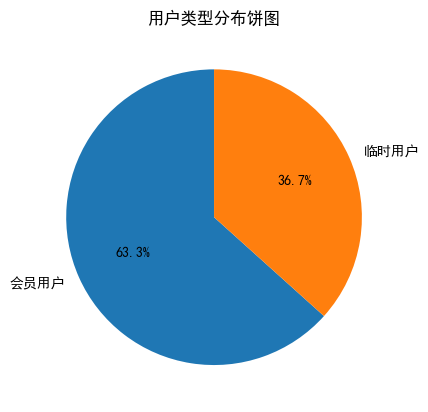

In [58]:
# 1.用户类型分布饼图

user_counts = df_clean['member_casual'].value_counts()

# 饼图颜色
colors = ['#1f77b4','#ff7f0e']

plt.pie(user_counts.values, labels=['会员用户','临时用户'], autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("用户类型分布饼图")

## 2. 骑行时长对比箱线图

Text(0.5, 1.0, '骑行时长分布对比')

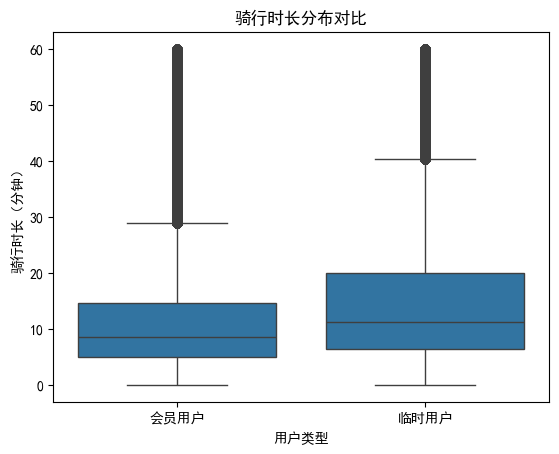

In [59]:
## 2. 骑行时长对比箱线图
df_plot = df_clean[df_clean['raid_duration_min'] <= 60]
df_plot.sample()

sns.boxplot(data=df_plot, x='member_casual' ,y='raid_duration_min')
# 修改坐标轴标签
plt.xlabel('用户类型')               # 修改 x 轴为中文
plt.ylabel('骑行时长（分钟）')        # 修改 y 轴为中文
# 设置 x 轴刻度标签（顺序与原始数据一致）
plt.xticks(ticks=[0, 1], labels=['会员用户', '临时用户'])

# 添加标题（你已添加）
plt.title('骑行时长分布对比')

## 3. 每小时使用量对比

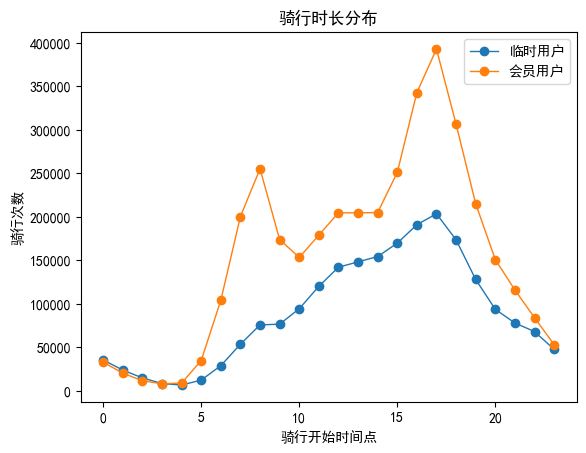

In [60]:
# 对不同用户类型（member 和 casual）在每个小时的骑行次数进行对比
'''
groupby(['member_casual', 'start_hour'])
→ 以用户类型和小时分组统计。

.size()
→ 统计每组的骑行次数。

.unstack(level=0, fill_value=0)
→ 把 member_casual 这个索引转换为列索引，让每个用户类型成为单独的列。

kind='line'：画折线图。

marker='o'：线上每个点加圆点标记。

linewidth=1：线宽设置为1。

'''
hourly_usage = df_clean.groupby(['member_casual', 'start_hour']).size().unstack(level=0, fill_value=0)
ax3 = hourly_usage.plot(kind='line', marker='o' , linewidth=1 )
ax3.set_title('骑行时长分布')
ax3.set_xlabel('骑行开始时间点')
ax3.set_ylabel('骑行次数')
ax3.legend(['临时用户', '会员用户'])

## 4. 工作日VS周末使用对比

[Text(0, 0, '工作日'), Text(1, 0, '周末')]

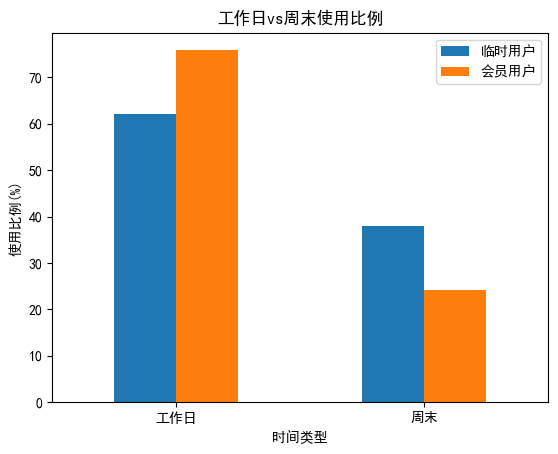

In [61]:
weekend_data = df_clean.groupby(['member_casual', 'is_weekend']).size().unstack(level=0, fill_value=0)
weekend_data_pct = weekend_data.div(weekend_data.sum()) * 100

ax4 = weekend_data_pct.plot(kind='bar' , color=colors)

ax4.set_title('工作日vs周末使用比例')
ax4.set_xlabel('时间类型')
ax4.set_ylabel('使用比例(%)')
ax4.legend(['临时用户', '会员用户'])
ax4.set_xticklabels(['工作日', '周末'], rotation=0)

## 5. 月度使用趋势

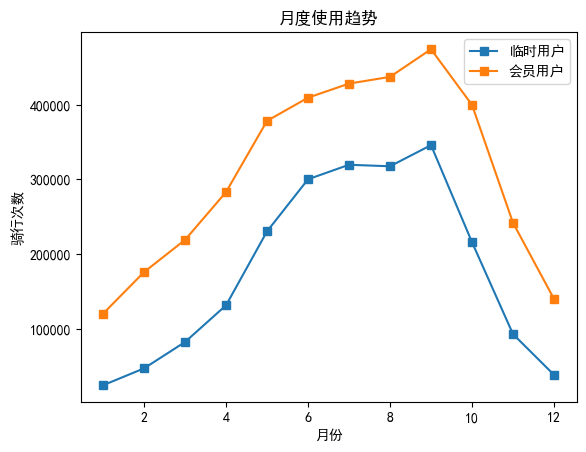

In [62]:
mouthly_usage = df_clean.groupby(['member_casual', 'start_month']).size().unstack(level=0, fill_value=0)

ax5 = mouthly_usage.plot(kind='line' , color=colors, marker='s')

ax5.set_title('月度使用趋势')
ax5.set_xlabel('月份')
ax5.set_ylabel('骑行次数')
ax5.legend(['临时用户', '会员用户'])

## 6. 单车类型偏好

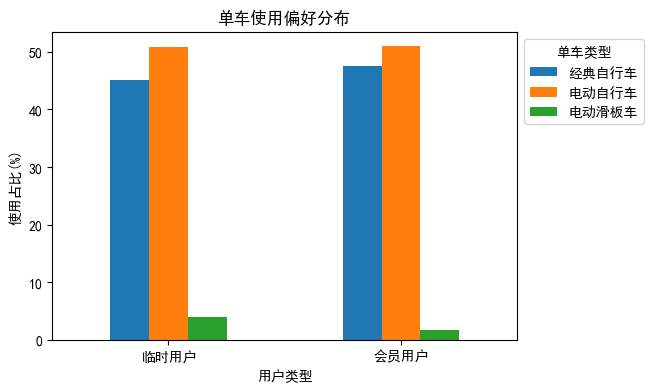

In [63]:
bike_perference = pd.crosstab(df_clean['member_casual'], df_clean['rideable_type'] ,normalize='index') * 100
ax6 = bike_perference.plot(kind='bar', figsize=(6,4))
ax6.set_title('单车使用偏好分布')
ax6.set_xlabel('用户类型')
ax6.set_xticklabels(['临时用户', '会员用户'], rotation=0)
ax6.set_ylabel('使用占比(%)')
ax6.legend(['经典自行车', '电动自行车', '电动滑板车'], title='单车类型', bbox_to_anchor=(1, 1), loc='upper left')

## 7. 详细时间分析

### 周末与工作日使用模式对比分析

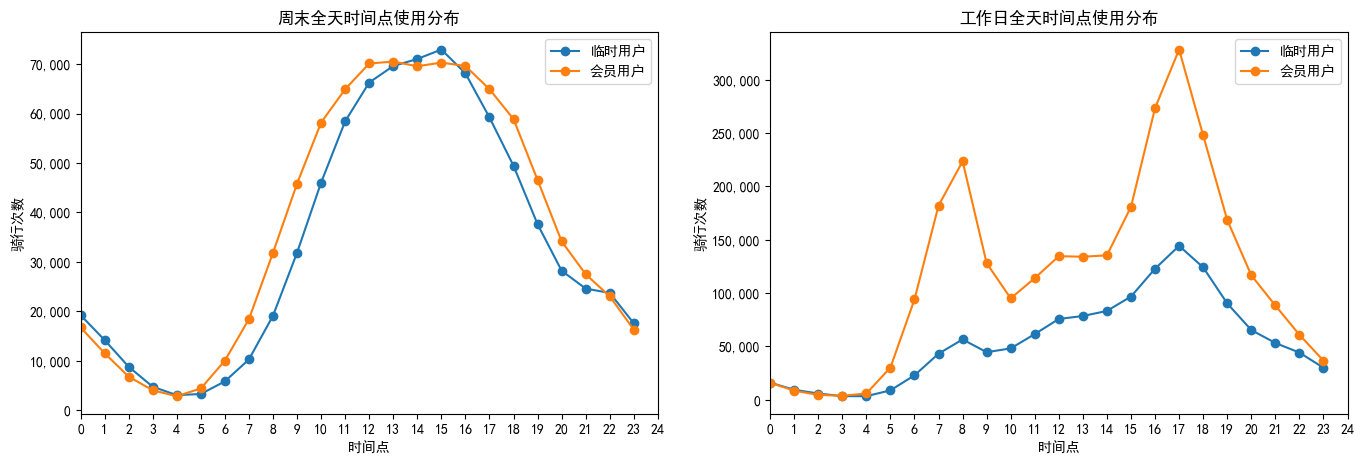

In [64]:
# 创建一个 1行2列 的画布（figsize 控制整体大小）
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# ================= 第一张图：周末使用模式 =================
weekday_hourly = (df_clean[df_clean['is_weekend'] == True]
    .groupby(['member_casual', 'start_hour'])
    .size().unstack(level=0, fill_value=0)
                 )
weekday_hourly.plot(kind='line', marker='o', ax=axs[0])
axs[0].set_title('周末全天时间点使用分布')
axs[0].set_xlabel('时间点')
axs[0].set_ylabel('骑行次数')
axs[0].legend(['临时用户', '会员用户'])

# 设置 y 轴显示格式为千分位
axs[0].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# 设置x轴刻度（完整24小时）
axs[0].set_xticks(np.arange(0, 25, 1))  # 0-23小时
axs[0].set_xlim(0, 24)  # 确保包含全部小时

# ================= 第二张图：工作日骑行分布 =================
weekday_hourly = (df_clean[df_clean['is_weekend'] == False]
    .groupby(['member_casual', 'start_hour'])
    .size().unstack(level=0, fill_value=0)
                 )

weekday_hourly.plot(kind='line', marker='o', ax=axs[1])  # ← 用 axs[1] 指定子图
axs[1].set_title('工作日全天时间点使用分布')
axs[1].set_xlabel('时间点')
axs[1].set_ylabel('骑行次数')
axs[1].legend(['临时用户', '会员用户'])

# 设置x轴刻度（完整24小时）
axs[1].set_xticks(np.arange(0, 25, 1))  # 0-23小时
axs[1].set_xlim(0, 24)  # 确保包含全部小时

# 设置 y 轴显示格式为千分位
axs[1].yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
# =========================================================

# 自动调整布局，避免重叠
plt.tight_layout(pad=2)

plt.show()

### 骑行时长分箱图

member_casual   casual  member
duration_range                
0-5分钟            16.04   24.33
5-10分钟           25.85   32.78
10-15分钟          17.91   18.55
15-30分钟          23.45   18.67
30-60分钟          11.35    5.08
1-2小时             4.37    0.48
2-4小时             1.04    0.11


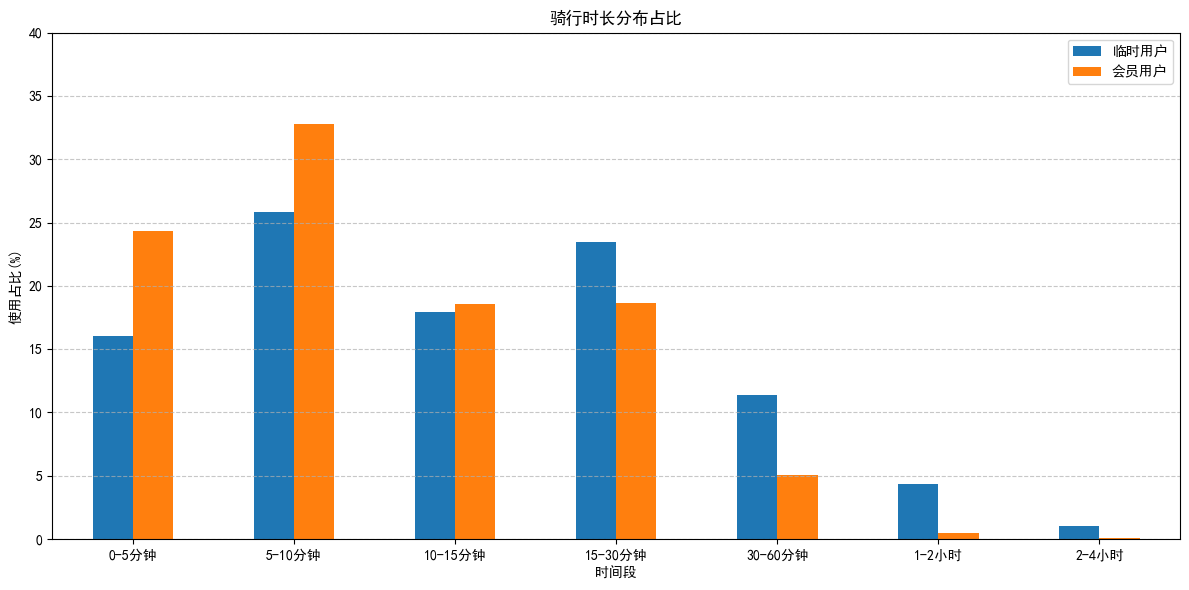

In [65]:
# 第一步先获取 所需的 数据交叉表，需要我们创建新字段
# 1. 分箱设置：定义骑行时间的区间
'''
duration_ranges 是分箱的边界（单位：分钟）
labels 是每个区间对应的标签，用来给每个时间段起名字
'''
duration_ranges = [0, 5, 10, 15, 30, 60, 120, 240] # 分钟
labels = ['0-5分钟', '5-10分钟', '10-15分钟', '15-30分钟','30-60分钟', '1-2小时', '2-4小时']

# 2. 新增字段 duration_range：将时长数据映射到分箱标签
'''
pd.cut() 会把每条记录的 raid_duration_min（骑行分钟数）按时间区间分箱，返回一个分类类型（category）
比如一条数据 raid_duration_min = 8，就会归为 "5-10分钟" 这类
'''
df_clean['duration_range'] = pd.cut(df_clean['raid_duration_min'], bins=duration_ranges, labels=labels)


# 3. 使用 pd.crosstab 分析各时间段的用户类型比例  : 交叉表，按用户类型分列并归一化（即百分比）
'''
pd.crosstab(...) 生成一个交叉表：
行：每个骑行时长区间（分好的 0-5分钟、5-10分钟等）
列：用户类型（member_casual，例如 "member" 和 "casual"）
每个单元格：在对应用户类型中，该时间段占的比例（因为用了 normalize='columns'）

结果乘以 100，将小数变成百分数。
'''
duration_analysis = pd.crosstab(df_clean['duration_range'], df_clean['member_casual'], normalize = 'columns') * 100
print(duration_analysis)

# 设置绘图框架
fig, ax = plt.subplots(1, 1, figsize=(12,6))
# 绘图
duration_analysis.plot(kind='bar', ax=ax)

# 美化图表
ax.set_title('骑行时长分布占比')
ax.set_xlabel('时间段')
ax.set_ylabel('使用占比(%)')
ax.legend(['临时用户', '会员用户'])
ax.set_ylim(0, 40)  # 设置 y 轴范围为 0-0.4
plt.xticks(rotation=0)
# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 避免标签遮挡
plt.tight_layout()

plt.show()


观察到的模式：
- 会员用户在工作日早晚高峰(7-9点，17-19点) 使用量明显增多
- 临时用户更倾向于周末使用，且使用时间更分散
- 临时用户的骑行时长普遍比会员用户更长
- 夏季6-9月是两类用户使用的高峰期